<a href="https://colab.research.google.com/github/bhattacharya5/AdvancedAI/blob/main/M21AIE211_Neural_Network_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/Biological Computer Vision/Assignment4"

/content/gdrive/My Drive/Colab Notebooks/Biological Computer Vision/Assignment4


In [ ]:
##This is one time execution to copy files from shared folder in the assignment to local google drive.
## command syntax : !cp -r 'above-copy-path/.' '/gdrive/My Drive/destinantion-path'

!cp -r "/content/gdrive/My Drive/Colab Notebooks/Biological Computer Vision/Assignment4/MY_data/." "/content/gdrive/My Drive/Colab Notebooks/Biological Computer Vision/Assignment4"

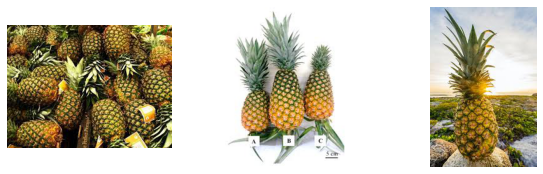

In [ ]:
import pathlib
import PIL
import matplotlib.pyplot as plt

train_dir = pathlib.Path("/content/gdrive/My Drive/Colab Notebooks/Biological Computer Vision/Assignment4/train")

fruits = list(train_dir.glob("pinenapple/*.jpeg"))

plt.figure(figsize=(10, 10))

for i in range(3):
    plt.subplot(3, 3, i + 1)
    img = PIL.Image.open(str(fruits[i]))
    plt.imshow(img)
    plt.axis('off')

plt.show()

In [ ]:
batch_size = 32
img_height = 150
img_width = 150

### Creating Train, Test,  Validation data set with image width and size 150 X 150

In [ ]:
import tensorflow as tf

train_dir = "/content/gdrive/My Drive/Colab Notebooks/Biological Computer Vision/Assignment4/train"
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,   
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1113 files belonging to 10 classes.


In [ ]:
class_names = train_data.class_names
num_classes = len(class_names)
print(class_names)
print(num_classes)

['Apple', 'Banana', 'avocado', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'strawberries', 'watermelon']
10


#Creating validation dataset

In [ ]:
import os, shutil, pathlib

currnt_dir = "/content/gdrive/My Drive/Colab Notebooks/Biological Computer Vision/Assignment4/"
original_dir = pathlib.Path(currnt_dir + "train")
fruits = class_names

def make_subset(subset_name, start_index, end_index):
    for category in fruits:
        dir = subset_name  / category
        if(os.path.exists(dir) == False):
          os.makedirs(dir)
        
        fnames = []
        for i in range(start_index, end_index):          
          fnames.append(f"img_{i}.jpeg")
          
        
        for fname in fnames:
          src = original_dir / category / fname
          dst = dir / fname          
          
          if(os.path.isfile(src)):            
            shutil.copyfile(src, dst)
            os.remove(src)
          
        for fname in fnames:
          src = original_dir / category / fname
          dst = dir / fname  

          if(os.path.isfile(src)):            
            os.remove(src)

new_base_dir = "validation"
if(os.path.exists(new_base_dir) == False):
  os.makedirs(new_base_dir)

new_base_dir = pathlib.Path(currnt_dir + new_base_dir)
make_subset(new_base_dir, start_index=1000, end_index=3000)

In [ ]:
validation_dir = "/content/gdrive/My Drive/Colab Notebooks/Biological Computer Vision/Assignment4/validation"
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,    
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1188 files belonging to 10 classes.


In [ ]:
from keras_preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height,img_width),
    batch_size = 32,
    class_mode='categorical'
)

Found 1113 images belonging to 10 classes.


In [ ]:
validation_dir = "/content/gdrive/My Drive/Colab Notebooks/Biological Computer Vision/Assignment4/validation"
validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height,img_width),
    batch_size = 32,
    class_mode='categorical'
)

Found 1188 images belonging to 10 classes.


In [ ]:
test_dir = "/content/gdrive/My Drive/Colab Notebooks/Biological Computer Vision/Assignment4/test"
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height,img_width),
    batch_size = 32, 
    class_mode='categorical' 
)

Found 1025 images belonging to 10 classes.


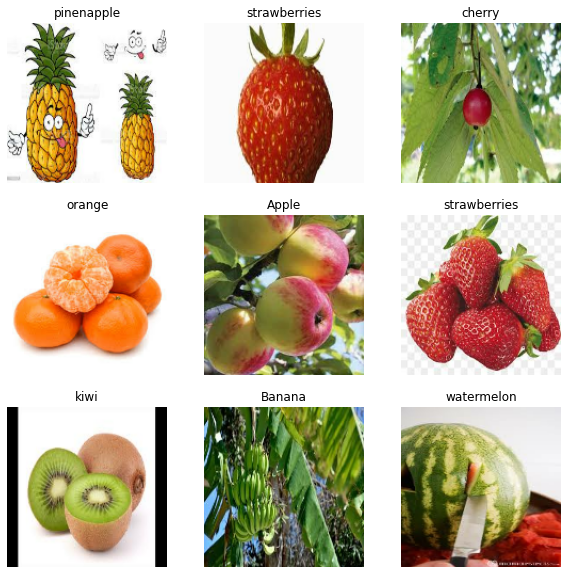

In [ ]:
plt.figure(figsize=(10, 10))

#to take 1 batch
for images, labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

# **Building the model**
## *Instantiating a small convnet for fruits classification*

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.Sequential([
    keras.Input(shape=(img_height, img_width, 3)),

    keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2),    
    keras.layers.Dropout(0.5),

    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_classes,  activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

## *Configuring the model for training*


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_generator,
  steps_per_epoch=15,  
  validation_steps=20,
  validation_data=validation_generator,
  epochs=100,
  verbose=1
)

Epoch 1/100
15/15 [==============================] - 569s 39s/step - loss: 2.3374 - accuracy: 0.1099 - val_loss: 2.3297 - val_accuracy: 0.1063
Epoch 2/100
15/15 [==============================] - 270s 19s/step - loss: 2.2872 - accuracy: 0.1250 - val_loss: 2.3323 - val_accuracy: 0.0984
Epoch 3/100
15/15 [==============================] - 130s 9s/step - loss: 2.2629 - accuracy: 0.1063 - val_loss: 2.3132 - val_accuracy: 0.1219
Epoch 4/100
15/15 [==============================] - 55s 4s/step - loss: 2.2551 - accuracy: 0.1480 - val_loss: 2.2759 - val_accuracy: 0.1312
Epoch 5/100
15/15 [==============================] - 38s 3s/step - loss: 2.2057 - accuracy: 0.1208 - val_loss: 2.2712 - val_accuracy: 0.0859
Epoch 6/100
15/15 [==============================] - 20s 1s/step - loss: 2.1580 - accuracy: 0.2042 - val_loss: 2.2461 - val_accuracy: 0.1406
Epoch 7/100
15/15 [==============================] - 9s 615ms/step - loss: 2.0790 - accuracy: 0.2250 - val_loss: 2.2956 - val_accuracy: 0.2062
Epoch 

In [ ]:
model.save("fruits_classification")

## Displaying curves of loss and accuracy during training

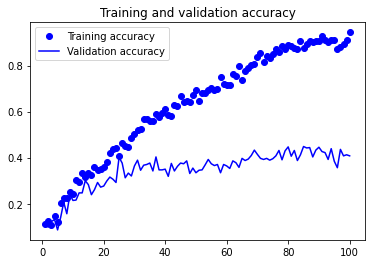

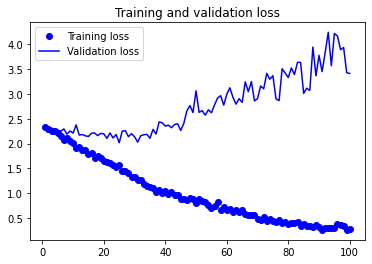

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## *Evaluating the model on the test set*

In [ ]:
loss, acc = model.evaluate(test_generator)

print('Loss:', loss)
print('Accuracy:', acc)

33/33 [==============================] - 440s 14s/step - loss: 4.1611 - accuracy: 0.3756
Loss: 4.1610541343688965
Accuracy: 0.37560975551605225


#Predict the labels for all the samples given in the “predict” set and display

In [ ]:
from tensorflow import keras
reconstructed_model = keras.models.load_model("fruits_classification")

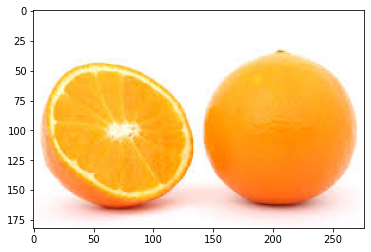

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2


predict_dir = "/content/gdrive/My Drive/Colab Notebooks/Biological Computer Vision/Assignment4/predict/"
image_array = []
for ech in os.listdir(predict_dir):
  image_array.append(ech)

img = cv2.imread(predict_dir + image_array[2])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [ ]:
image_array[2]

'img_381.jpeg'

## So `img_381.jpeg` is that of an Orange. Let us see what our model will predict now.

In [ ]:
from keras_preprocessing import image

# load and prepare the image
filename = predict_dir + image_array[2]
# load the image
img = image.load_img(filename, grayscale=False, target_size=(150, 150))
# convert to array
img = image.img_to_array(img)
# reshape into a single sample with 1 channel
img = img.reshape(1, 150, 150, 3)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0
# predict the class
result = model.predict(img)
print(result[0])

1/1 [==============================] - 0s 64ms/step
[0.13009632 0.0901958  0.05984678 0.11089588 0.08384506 0.11567713
 0.19852626 0.07140684 0.06376612 0.07574377]


### So our model has classified above image as orange

In [ ]:
class_names[result.argmax()]

'orange'

# Our model is able to correctly identify image from predict data set.